In [1]:
import neurolab as nl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate training data
min_value = -12
max_value = 12
num_datapoints = 90

In [3]:
x = np.linspace(min_value, max_value, num_datapoints)
y = 2*np.square(x)+7
y /= np.linalg.norm(y)

In [4]:
data = x.reshape(num_datapoints, 1)
labels = y.reshape(num_datapoints, 1)

In [5]:
# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')

In [6]:
# Define a multilayer neural network with 2 hidden layers;
# Each hidden layer consists of 10 neurons and the output layer 
# consists of 1 neuron
multilayer_net = nl.net.newff([[min_value, max_value]], [10,10,1])

In [7]:
# Change the training algorithm to gradient descent
multilayer_net.trainf = nl.train.train_gd

In [8]:
# Train the network
error = multilayer_net.train(data, labels, epochs=800, show=100, goal=0.01)

Epoch: 100; Error: 0.04974020560904858;
The goal of learning is reached


In [9]:
# Predict the output for the training inputs
predicted_output = multilayer_net.sim(data)

In [10]:
# Plot training error
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

In [13]:
# Plot predictions
x2 = np.linspace(min_value, max_value, num_datapoints * 2)
y2 = multilayer_net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
y3 = predicted_output.reshape(num_datapoints)

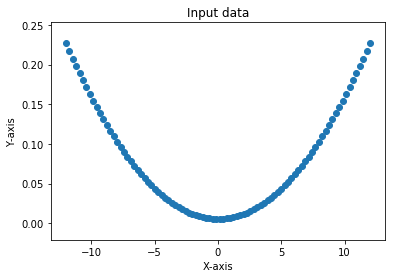

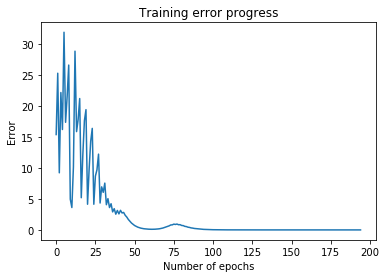

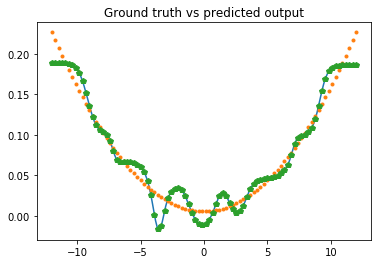

In [14]:
plt.figure()
plt.plot(x2,y2,'-',x,y,'.',x,y3,'p')
plt.title('Ground truth vs predicted output')

plt.show()